In [11]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

Price        Date        Open        High         Low       Close   Adj Close  \
Ticker                   GOOG        GOOG        GOOG        GOOG        GOOG   
246    2024-12-16  194.365005  200.639999  194.110001  198.160004  198.160004   
247    2024-12-17  198.529999  202.880005  196.690002  197.119995  197.119995   
248    2024-12-18  196.830002  198.690002  189.279999  190.149994  190.149994   
249    2024-12-19  193.279999  194.600006  189.520004  189.699997  189.699997   
250    2024-12-20  187.009995  194.134995  186.369995  192.960007  192.960007   

Price     Volume  
Ticker      GOOG  
246     32248600  
247     24129500  
248     27638400  
249     26981200  
250     45260900  


In [12]:
data = data[["Date", "Close"]]
print(data.head())

Price        Date       Close
Ticker                   GOOG
0      2023-12-22  142.720001
1      2023-12-26  142.820007
2      2023-12-27  141.440002
3      2023-12-28  141.279999
4      2023-12-29  140.929993


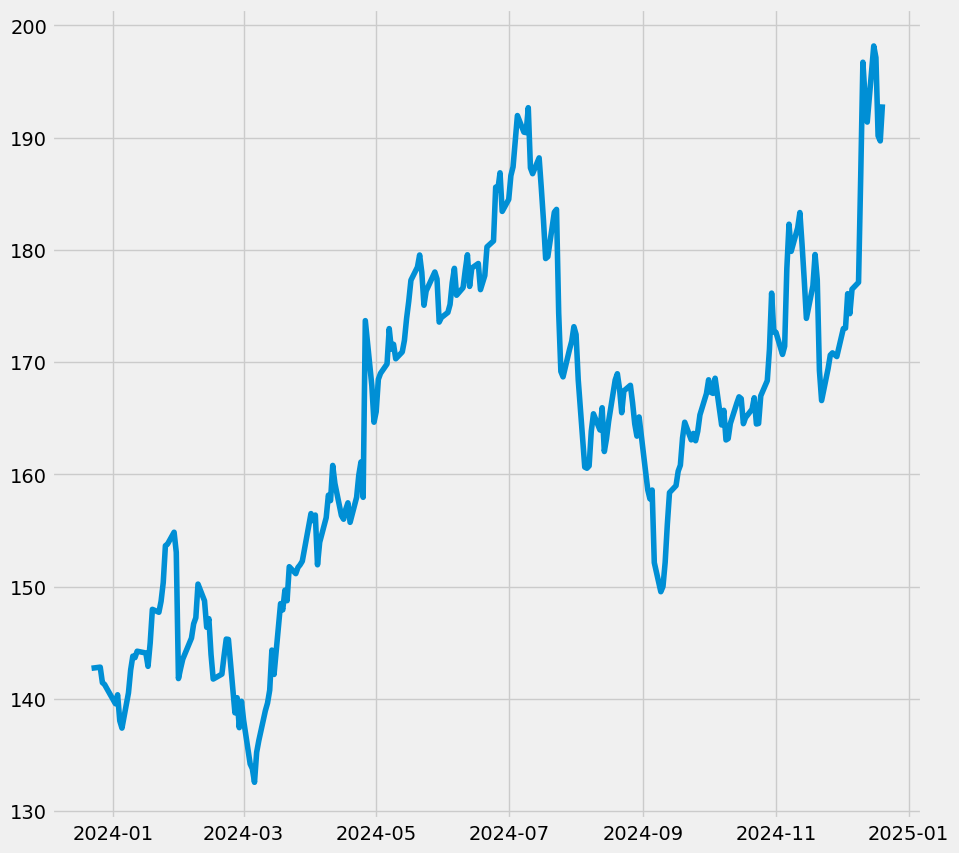

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

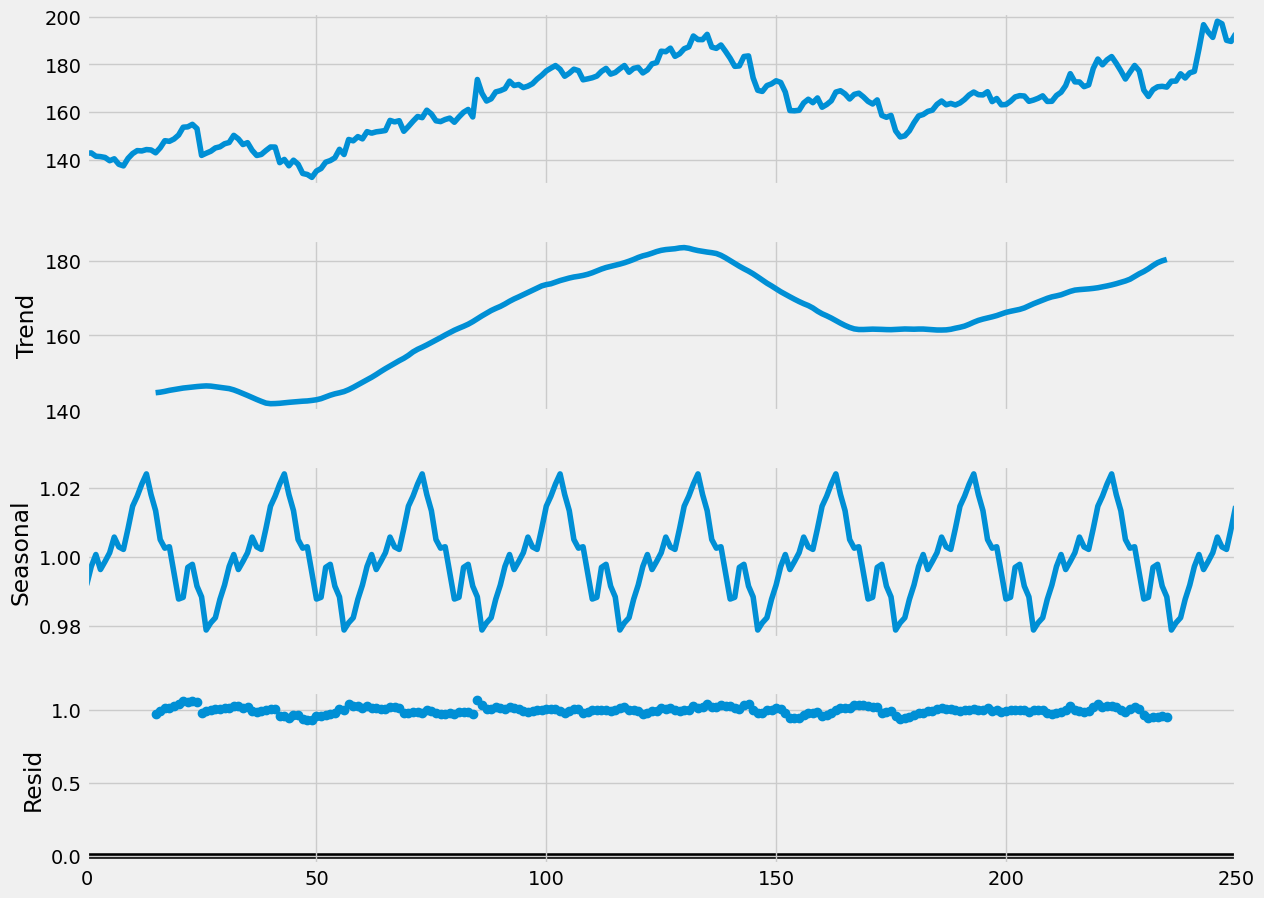

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

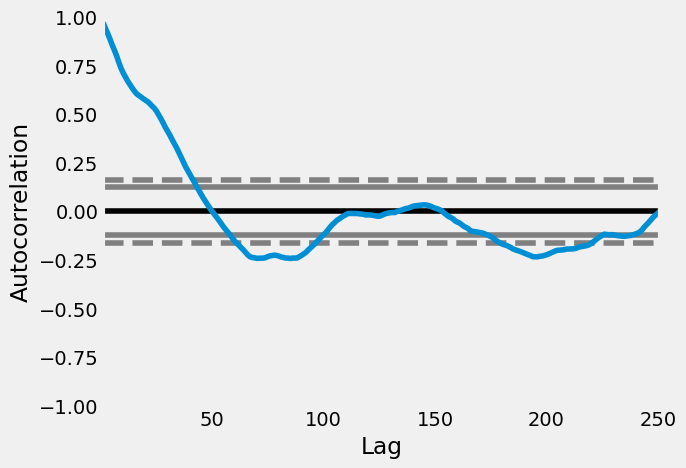

In [17]:

pd.plotting.autocorrelation_plot(data["Close"])

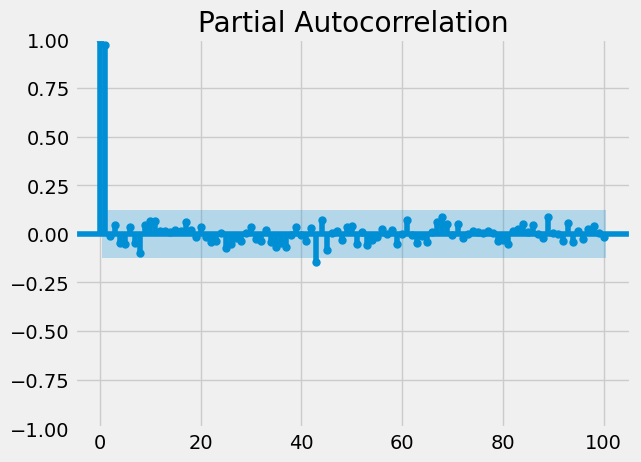

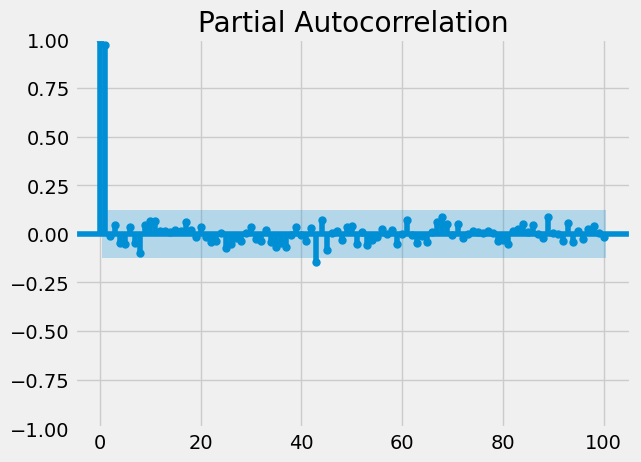

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [21]:
p, d, q = 5, 1, 1
# Import the updated ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  251
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -618.261
Date:                Sat, 21 Dec 2024   AIC                           1250.523
Time:                        04:47:36   BIC                           1275.173
Sample:                             0   HQIC                          1260.444
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1104      4.277     -0.026      0.979      -8.494       8.273
ar.L2         -0.1034      0.211     -0.490      0.624      -0.517       0.310
ar.L3         -0.0540      0.474     -0.114      0.9

In [22]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      142.720054
2      142.824309
3      141.359952
4      141.427539
          ...    
246    191.609377
247    199.074544
248    196.121649
249    189.677996
250    190.783788
Name: predicted_mean, Length: 251, dtype: float64


We have used **ARIMA** model to understand how it works but here as the data isn't ***stationary***, the predicted values are wrong. In order to predict the vales correctly, we use **SARIMA** model here(as the data is ***seasonal***)

In [23]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               GOOG   No. Observations:                  251
Model:             SARIMAX(5, 1, 1)x(5, 1, 1, 12)   Log Likelihood                -599.672
Date:                            Sat, 21 Dec 2024   AIC                           1225.344
Time:                                    04:49:53   BIC                           1270.483
Sample:                                         0   HQIC                          1243.536
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7768      0.859      0.905      0.366      -0.906       2.460
ar.L2         -0.1323      0.112   

In [24]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    195.216210
252    196.489677
253    195.354661
254    192.457053
255    192.502640
256    193.584564
257    194.270504
258    194.710316
259    194.889560
260    194.223151
261    192.758774
Name: predicted_mean, dtype: float64


<Axes: >

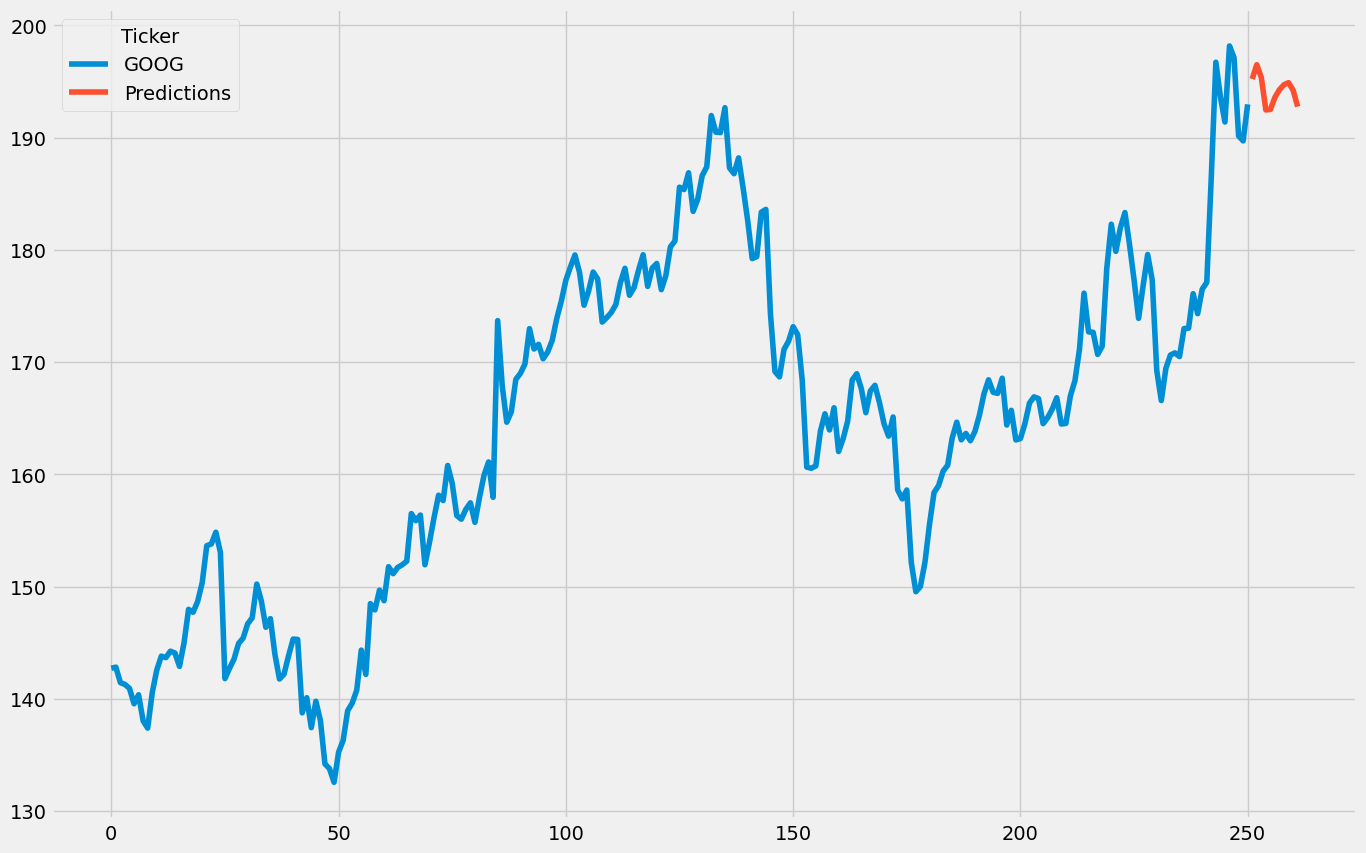

In [25]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")